In [3]:
import pandas as pd
import requests
import datetime
import matplotlib.pyplot as plt
import seaborn as sbs
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller

In [4]:
china=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00381/PRSA_data_2010.1.1-2014.12.31.csv',parse_dates=[[1,2,3,4]],date_parser=lambda x: datetime.datetime.strptime(x,'%Y %m %d %H'))

In [5]:
china.dtypes

year_month_day_hour    datetime64[ns]
No                              int64
pm2.5                         float64
DEWP                            int64
TEMP                          float64
PRES                          float64
cbwd                           object
Iws                           float64
Is                              int64
Ir                              int64
dtype: object

Suspected autocorrelation between:
- DEWP, TEMP, PRES
- Ir, PRES
- Is, PRES, TEMP

In [6]:
#create a datetime index
china.set_index('year_month_day_hour',inplace=True)

In [7]:
china.dtypes

No         int64
pm2.5    float64
DEWP       int64
TEMP     float64
PRES     float64
cbwd      object
Iws      float64
Is         int64
Ir         int64
dtype: object

In [8]:
china.drop(labels='No',inplace=True,axis=1)

In [9]:
china.columns=['pollution', 'dew', 'temp', 'press', 'wnd_dir', 'wnd_spd', 'snow', 'rain']

In [10]:
china['pollution'].fillna(0,inplace=True)
china=china[24:]

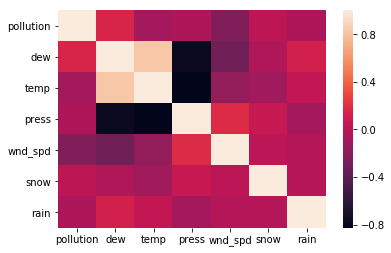

In [11]:
serials=china.corr()
sbs.heatmap(serials)
plt.show()
#some very strong serial correlation present

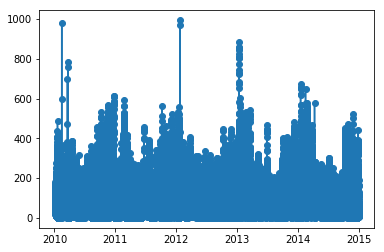

In [12]:
plt.close()
plt.plot(china['pollution'],marker='o',linestyle='solid')
plt.show()

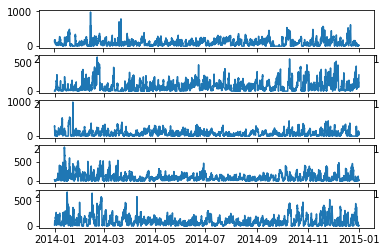

In [13]:
#plot each year above the others using the same x-axis if possible
plt.close()
fig, (ax1,ax2,ax3,ax4,ax5)=plt.subplots(5,1, sharex=False)
ax1.plot(china['2010']['pollution'])
ax2.plot(china['2011']['pollution'])
ax3.plot(china['2012']['pollution'])
ax4.plot(china['2013']['pollution'])
ax5.plot(china['2014']['pollution'])
#ax5.set_label(china.index.values)
plt.show()

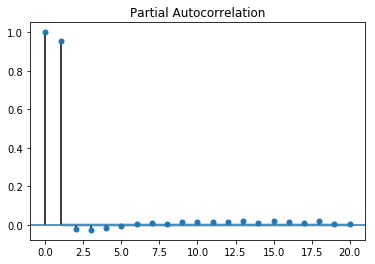

In [14]:
#basic stationarity analysis on the dependent variable: pollution
plot_acf(china['pollution'],lags=20)
plot_pacf(china['pollution'],lags=20)
#This appears to be a AR(1) process

In [15]:
#this is a stationary process according to adfuller... no unit roots
adfuller(china['pollution'])[1]

0.0

### Model prep: Dataframe transformations
Explanation of the min-max scalar transform: http://benalexkeen.com/feature-scaling-with-scikit-learn/
Dataframe preparation for a supervised time series model: https://machinelearningmastery.com/convert-time-series-supervised-learning-problem-python/

In [16]:
china.dtypes
#notice that wnd_dir is a categorical variable and will need to be encoded

pollution    float64
dew            int64
temp         float64
press        float64
wnd_dir       object
wnd_spd      float64
snow           int64
rain           int64
dtype: object